# K-Means Clustering: Player Position Analysis

In this notebook, we'll use k-means clustering to analyze player positions based on their attributes. Unlike our supervised learning approaches where we explicitly labeled players as offensive or defensive, here we'll let the algorithm discover natural groupings based on player statistics.

## Our Task
We'll implement k-means clustering to group players based on their attributes, potentially discovering natural position groupings or player archetypes.

## Understanding Our Dataset
These are the features we'll want to use to get an idea of positioning from::
- Key Performance Stats (pace, shooting, passing, dribbling, defending, physical)

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme 
sns.set_theme()

# Load the dataset
players_df = pd.read_csv("../data/players_data.csv")

# Select features for clustering
features = ["shooting", "defending", "pace", "dribbling", "physic"]
filtered_df = players_df.dropna(subset=features)
X = filtered_df[features].values

/var/folders/pz/s1ggtx853xx_qxny9g89ffgm0000gn/T/ipykernel_64314/419152038.py:10: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  players_df = pd.read_csv("../data/players_data.csv")


## Implementation

In [31]:
class KMeans:
	def __init__(self, k=3, max_iter=100):
		self.k = k
		self.max_iter = max_iter
		self.centers = None
		
	def distance(self, point, center):
		return np.sqrt(sum((point[j] - center[j])**2 for j in range(len(point))))
	
	def assign_label(self, point):
		distances = np.array([self.distance(point, center) for center in self.centers])
		return np.argmin(distances)
	
	def assign_clusters(self, X):
		return [self.assign_label(x) for x in X]
	
	def update_centers(self, X, labels):
		n_features = X.shape[1]
		new_centers = np.zeros((self.k, n_features))
		counts = np.zeros(self.k)
		
		for i, point in enumerate(X):
			label = labels[i]
			new_centers[label] += point
			counts[label] += 1
			
		# Avoid division by zero
		counts = np.where(counts == 0, 1, counts)
		# print("HEY")
		# print(counts)
		# print(new_centers)
		new_centers = new_centers / counts[:, np.newaxis]
		return new_centers
	
	def fit(self, X):
		# Initialize centers randomly
		indices = np.random.choice(X.shape[0], self.k, replace=False)
		self.centers = X[indices]
		# print(self.centers)
		
		for _ in range(self.max_iter):
			labels = self.assign_clusters(X)
			new_centers = self.update_centers(X, labels)
			# print("NEW", new_centers)
			
			# Check convergence
			if np.allclose(self.centers, new_centers):
				break
				
			self.centers = new_centers
		# print(self.centers)
		
		return self.assign_clusters(X)
	
	def predict(self, X):
		return self.assign_clusters(X)

## K-Means Clustering

In [32]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit KMeans
kmeans = KMeans(k=2)
labels = kmeans.fit(X_scaled)

## Cluster Graphic
We see a cluster centered more towards a higher defensive value and we see another centered towards a higher shooting value.

This checks out with our expectations that players who are defenders have similar profiles/ stat distributions regardless of the weight of their stats. The same goes for players who are more offensive.

It can appear in the graph that some points appear in some cluster when they are closer to another. Keep in mind that we plot only 2 of the features because they are the most dominant ones in our dataset. But, the space is indeed multidimensional. We have only projected the 5d point to a 2d space. 

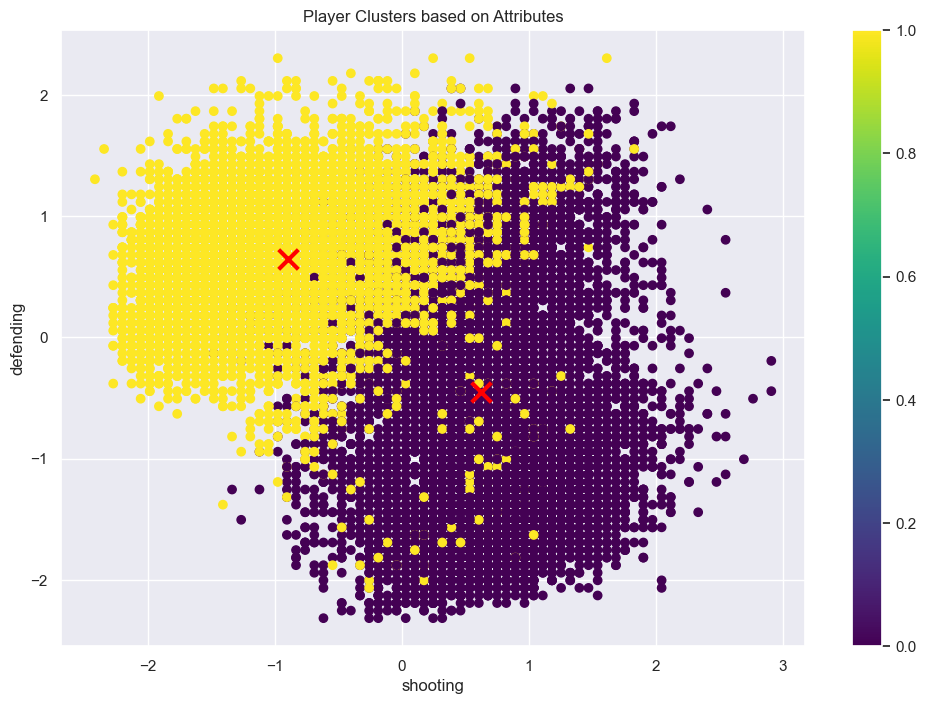

In [33]:
# Visualize clusters using first two features
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('Player Clusters based on Attributes')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.colorbar(scatter)
plt.show()

In [34]:
# Analyze cluster characteristics
filtered_df.loc[:,'Cluster'] = labels
cluster_means = filtered_df.groupby('Cluster')[features].mean()
print("\nCluster Characteristics:")
print(cluster_means)


Cluster Characteristics:
          shooting  defending       pace  dribbling     physic
Cluster                                                       
0        61.195542  44.923795  72.801866  67.683256  62.528046
1        40.108108  62.476577  61.956156  55.824775  68.338889


/var/folders/pz/s1ggtx853xx_qxny9g89ffgm0000gn/T/ipykernel_64314/1018851157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,'Cluster'] = labels
